In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
g = nx.DiGraph()
g.add_edge('a', 'b', w=1)
g.add_edge('b', 'c', w=2)
g.add_edge('c', 'd', w=1)
g.add_edge('b', 'd', w=1) 
g.add_edge('d', 'a', w=2)
g.add_edge('d', 'c', w=10)

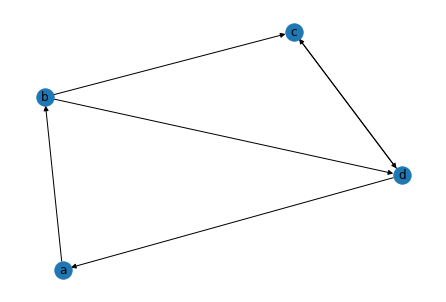

In [4]:
nx.draw(g, with_labels=True)
plt.show()

In [5]:
print(nx.shortest_path(g, 'd', 'c', weight='w'))

['d', 'a', 'b', 'c']


In [6]:
for node in g.nodes():
    print(node, g.out_degree(node))

a 1
b 2
c 1
d 2


In [7]:
h = nx.MultiDiGraph()
L = [('d','a',1)]
for n1, n2, d in g.edges(data=True):
    L.append((n1, n2, d['w']))

print(L)
h.add_weighted_edges_from(L)
h.degree(weight='w') # não funciona bem.. não dá os pesos certos

[('d', 'a', 1), ('a', 'b', 1), ('b', 'c', 2), ('b', 'd', 1), ('c', 'd', 1), ('d', 'a', 2), ('d', 'c', 10)]


DiMultiDegreeView({'d': 5, 'a': 3, 'b': 3, 'c': 3})

In [12]:
#Let's import the ZKC graph:
ZKC_graph = nx.karate_club_graph()

#Let's keep track of which nodes represent John A and Mr Hi
Mr_Hi = 0
John_A = 33

#Let's display the labels of which club each member ended up joining
club_labels = nx.get_node_attributes(ZKC_graph,'club')

#just show a couple of the labels
print({key:club_labels[key] for key in range(10,16)})

{10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer'}


In [14]:
A = nx.convert_matrix.to_numpy_matrix(ZKC_graph)
A

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

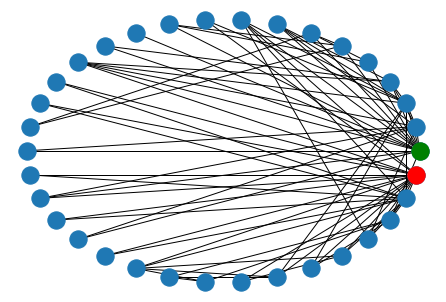

In [15]:
#To plot using networkx we first need to get the positions we want for each node. 
#Here we will use a ciruclar layout but there are many other variations you could choose!
circ_pos = nx.circular_layout(ZKC_graph) 

#Use the networkx draw function to easily visualise the graph
nx.draw(ZKC_graph,circ_pos)

#let's highlight Mr Hi (green) and John A (red)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[John_A], node_color='r', alpha=1)

In [18]:
density = nx.density(ZKC_graph)

print('The edge density is: ' + str(density))

The edge density is: 0.13903743315508021


In [19]:
#the degree function in networkx returns a DegreeView object capable of iterating through (node, degree) pairs
degree = ZKC_graph.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 4.588235294117647


Text(0.5, 1.0, 'Karate Club: Node Degree')

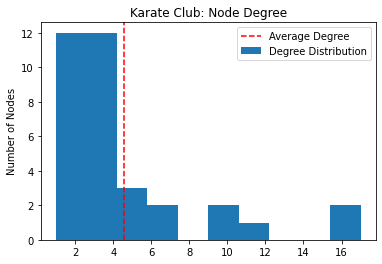

In [20]:
#we now plot the degree distribution to get a better insight
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree')